# 🧠 **Understanding ADHD**

## 🧐 **Understudied Brains' of Women**

**1. How does menopause affect women's brains?**

**2. Why are women more likely to develop Alzheimer's than men?**  

**3. Why does dementia manifest differently in women versus men?**

**4. The Alzheimer's drug Lepembi slows cognitive decline by 12% in women, compared to 43% in men.** 

## 🎯 **Goals & Tasks:**

**1. Provide insights by means of Data.**

**2. Understanding ADHD in women and children.**

**3. Advancing personalized medicine for neurodevelopmental disorders through an effective model.** 

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp 
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore')  

In [2]:
os.listdir('/kaggle/input/adhd-train-data')   
os.listdir('/kaggle/input/adhd-solutions')  
os.listdir('/kaggle/input/functional-matrices')   

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

##  ⏳ ***Data Loading & Merging***  

In [3]:
df_quan = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_QUANTITATIVE .xlsx')   
df_cat = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_CATEGORICAL.xlsx') 
df_solu = pd.read_excel('/kaggle/input/adhd-solutions/TRAINING_SOLUTIONS.xlsx')
df_func = pd.read_csv('/kaggle/input/functional-matrices/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

In [4]:
df = df_quan.merge(df_cat, on='participant_id', how='inner').merge(
                                                                    df_solu, 
                                                                    on='participant_id', 
                                                                    how='inner')

## 🔭 ***Data Exploration (EDA)***  

### 🔍 **1. Info & Dtype of Data**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1200 non-null   float64
 2   ColorVision_CV_Score              1190 non-null   float64
 3   APQ_P_APQ_P_CP                    1201 non-null   float64
 4   APQ_P_APQ_P_ID                    1201 non-null   float64
 5   APQ_P_APQ_P_INV                   1201 non-null   float64
 6   APQ_P_APQ_P_OPD                   1201 non-null   float64
 7   APQ_P_APQ_P_PM                    1201 non-null   float64
 8   APQ_P_APQ_P_PP                    1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems          1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total        1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems        1204 non-null   float64
 12  SDQ_SD

### 🔍 **2.Take a Glimpse of Data**

In [6]:
df.head(5).T   

,0,1,2,3,4
participant_id,00aIpNTbG5uh,00fV0OyyoLfw,04X1eiS79T4B,05ocQutkURd6,06YUNBA9ZRLq
EHQ_EHQ_Total,100.0,92.27,86.67,93.34,0.0
ColorVision_CV_Score,13.0,14.0,14.0,14.0,14.0
APQ_P_APQ_P_CP,3.0,3.0,3.0,3.0,8.0
APQ_P_APQ_P_ID,15.0,12.0,21.0,11.0,12.0
APQ_P_APQ_P_INV,44.0,35.0,37.0,42.0,35.0
APQ_P_APQ_P_OPD,14.0,25.0,18.0,15.0,22.0
APQ_P_APQ_P_PM,20.0,28.0,26.0,20.0,12.0
APQ_P_APQ_P_PP,27.0,30.0,28.0,28.0,24.0
SDQ_SDQ_Conduct_Problems,3.0,5.0,3.0,0.0,6.0


### 🔍 **3. Descriptive Statistics**

In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
EHQ_EHQ_Total,1200.0,59.514750,49.744631,-100.0,46.670000,77.800000,94.470000,100.000000
ColorVision_CV_Score,1190.0,13.419328,2.112830,0.0,14.000000,14.000000,14.000000,14.000000
APQ_P_APQ_P_CP,1201.0,3.819317,1.330348,2.0,3.000000,3.000000,4.000000,12.000000
APQ_P_APQ_P_ID,1201.0,13.337219,3.593562,5.0,11.000000,13.000000,16.000000,28.000000
APQ_P_APQ_P_INV,1201.0,39.767694,4.872729,23.0,36.000000,40.000000,43.000000,50.000000
APQ_P_APQ_P_OPD,1201.0,17.963364,3.333965,7.0,16.000000,18.000000,20.000000,28.000000
APQ_P_APQ_P_PM,1201.0,16.557036,5.146548,5.0,13.000000,16.000000,19.000000,37.000000
APQ_P_APQ_P_PP,1201.0,25.498751,3.053720,13.0,23.000000,26.000000,28.000000,30.000000
SDQ_SDQ_Conduct_Problems,1204.0,2.074751,2.022992,0.0,0.000000,2.000000,3.000000,10.000000
SDQ_SDQ_Difficulties_Total,1204.0,12.213455,6.517330,0.0,7.000000,12.000000,17.000000,34.000000


### 🔍 **4. Dimensions of DataFrame**

In [8]:
print(f'Rows: {df.shape[0]}') 
print(f'Colums: {df.shape[1]}')     

Rows: 1213
Colums: 30


### 🔍 **5. Check Duplicated & Unique Values & Missing Values**

In [9]:
print(f'Duplicated: {df.duplicated().sum()}') 

Duplicated: 0


In [10]:
unique = pd.DataFrame({'No.of Unique Values': df.nunique().sort_values(ascending=False)})    

unique.style.background_gradient('inferno') 

,No.of Unique Values
participant_id,1213
MRI_Track_Age_at_Scan,838
EHQ_EHQ_Total,158
SDQ_SDQ_Difficulties_Total,34
APQ_P_APQ_P_PM,30
APQ_P_APQ_P_INV,26
APQ_P_APQ_P_ID,21
APQ_P_APQ_P_OPD,21
SDQ_SDQ_Externalizing,21
SDQ_SDQ_Internalizing,18


In [11]:
missing = pd.DataFrame({ 'No.of Missing Values': df.isna().sum().sort_values(ascending=False),
                         '% of Missing Values': (df.isna().mean() * 100).sort_values(ascending=False),
                       })

missing.index.name = 'Features'  

missing.style.background_gradient('magma')


,No.of Missing Values,% of Missing Values
Features,,
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723


## 🔨***Data Cleaning & Preprocessing***  

### 🔍 **1. Handling Missing Values**

In [12]:
df['Barratt_Barratt_P2_Occ'].sample(10) 

582     20.0
661     35.0
622     30.0
227     15.0
258     30.0
449     30.0
780     45.0
925     35.0
1088    45.0
281     45.0
Name: Barratt_Barratt_P2_Occ, dtype: float64

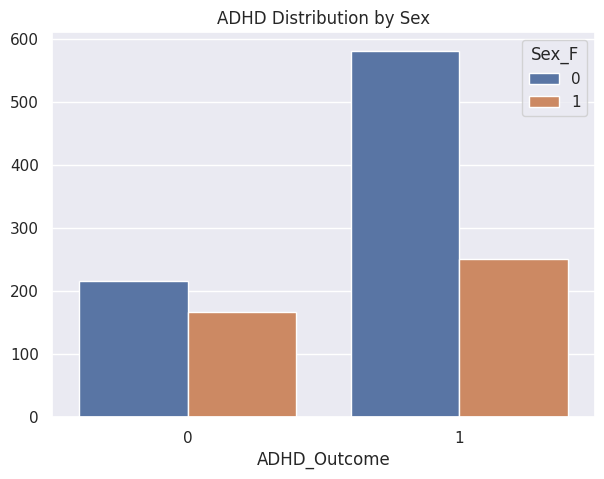

In [13]:
plt.figure(figsize=(7,5))

sns.countplot(data=df, 
              x='ADHD_Outcome', 
              hue='Sex_F') 

plt.ylabel('') 
plt.title('ADHD Distribution by Sex')
plt.show() 

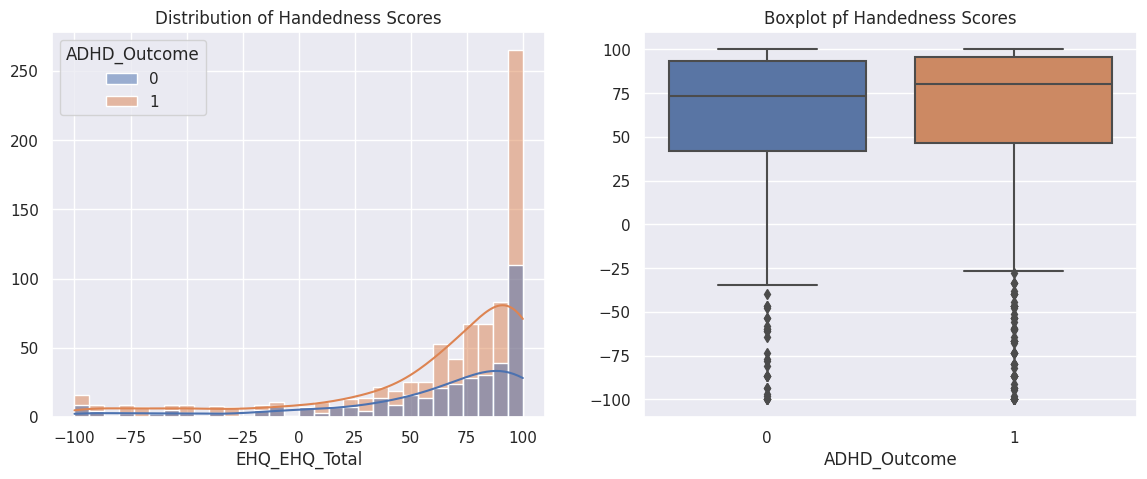

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(14, 5)) 

sns.histplot(data = df,
             x = 'EHQ_EHQ_Total', 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 

ax1.set_title('Distribution of Handedness Scores') 
ax1.set_ylabel('')


sns.boxplot(data=df,
            x='ADHD_Outcome', 
            y='EHQ_EHQ_Total',
            ax=ax2)   

ax2.set_title('Boxplot pf Handedness Scores') 
ax2.set_ylabel('')


plt.show() 

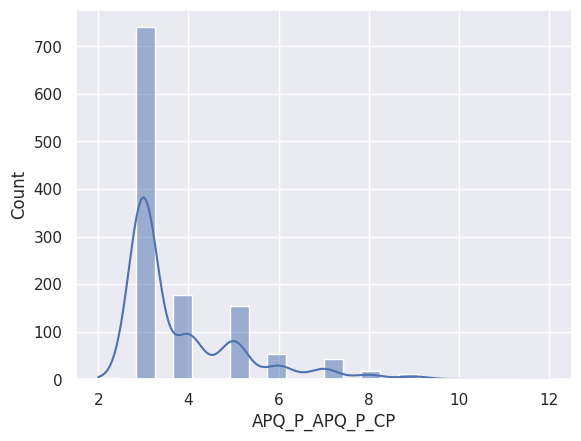

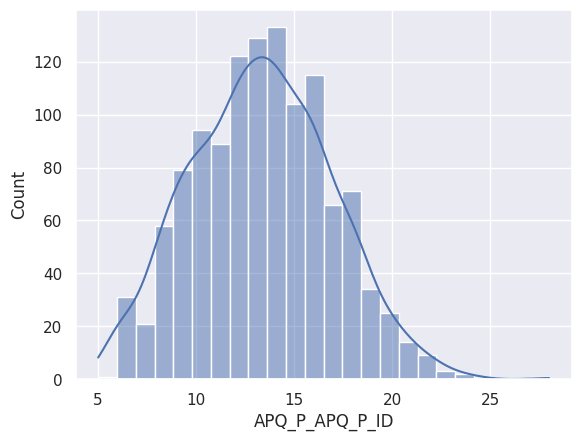

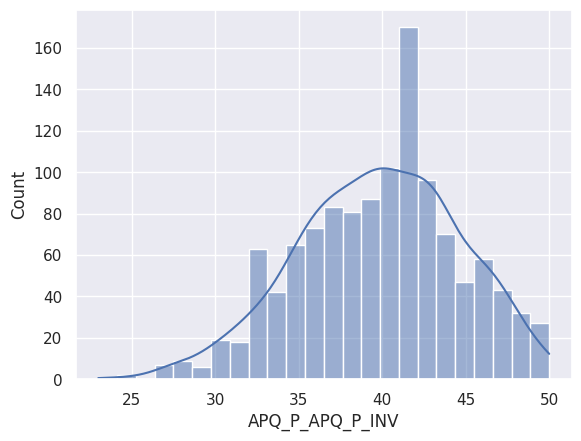

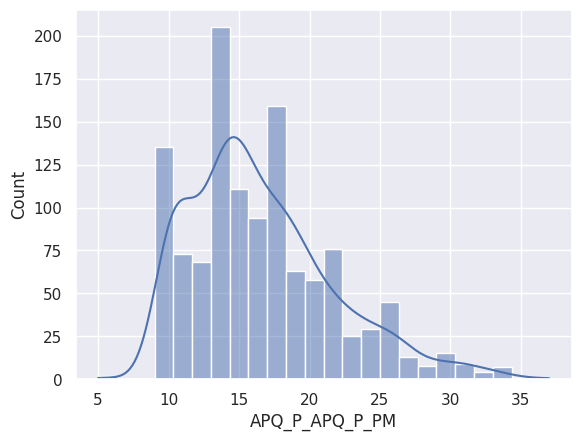

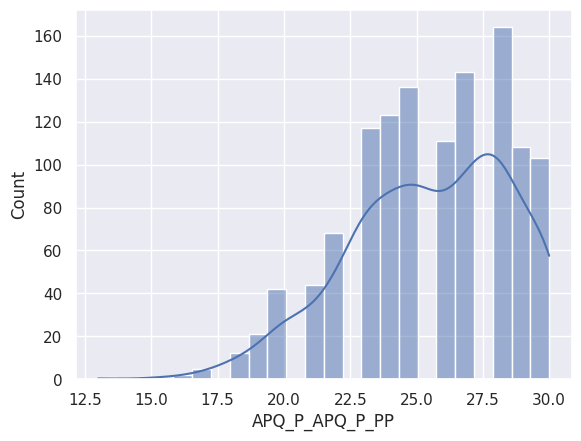

In [15]:
cols_APQ = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']


for col in cols_APQ: 
    
    sns.histplot(data=df_quan, 
                 x = col,
                 bins=24,
                 kde=True) 
    plt.show() 